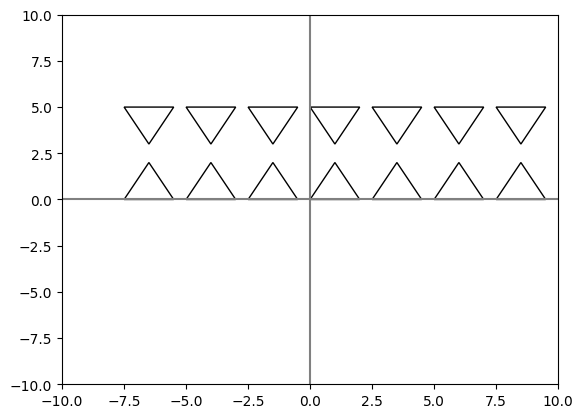

In [178]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.transforms as transforms
import matplotlib
import numpy as np

def figure_generators(funcname, length, coord, counts):
    polygons = []
    for i in range(abs(counts)):
        coord = (coord[0] + (length + 0.5) * (counts / abs(counts)), coord[1])
        polygons.append(funcname(length, coord))
    return polygons
    

def tr_translate(polygon, dx, dy):
    translated_vertices = transforms.Affine2D().translate(dx, dy).transform(polygon.get_xy())
    return Polygon(translated_vertices, edgecolor=polygon.get_edgecolor(), facecolor = polygon.get_facecolor())

def tr_rotate(polygon, angle):
    rotated_vertices = transforms.Affine2D().rotate_deg(angle).transform(polygon.get_xy())
    return Polygon(rotated_vertices, edgecolor=polygon.get_edgecolor(), facecolor = polygon.get_facecolor())

def tr_symmetry(polygon, axis):
    if axis == 'x':
        symmetry = transforms.Affine2D().scale(1, -1)
    elif axis == 'y':
        symmetry = transforms.Affine2D().scale(-1, 1)
    else:
        raise ValueError("Некорректная ось симметрии. Используйте 'x' или 'y'.")
    symmetrical_vertices = symmetry.transform(polygon.get_xy())
    return Polygon(symmetrical_vertices, edgecolor=polygon.get_edgecolor(), facecolor = polygon.get_facecolor())
    
def tr_homothety(polygon, scale):
    scaled_vertices = transforms.Affine2D().scale(scale, scale).transform(polygon.get_xy())
    return Polygon(scaled_vertices, edgecolor=polygon.get_edgecolor(), facecolor = polygon.get_facecolor())

def gen_rectangle(length, coord):
    coord_arr = np.array([coord, (coord[0]  + length, coord[1]), (coord[0] + length, coord[1] + length), (coord[0], coord[1] + length)])
    square = pat.Polygon(coord_arr, edgecolor = "black", facecolor = 'none')
    return square
    
def gen_triangle(length, coord):
    coord_arr = np.array([coord, (coord[0] + length, coord[1]), ((coord[0] + length / 2), coord[1] + length)])
    triangle = pat.Polygon(coord_arr, edgecolor = "black", facecolor = 'none')
    return triangle
    
def gen_hexagon(length, coord):
    coord_arr = np.array([coord, (coord[0] + length / 2, coord[1]), (coord[0] + length, coord[1] + length / 2), (coord[0] + length / 2, coord[1] + length), (coord[0], coord[1] + length), (coord[0] - length / 2, coord[1] + length / 2)])
    hexagon = pat.Polygon(coord_arr, edgecolor = "black", facecolor = 'none')
    return hexagon
    

figures = figure_generators(gen_triangle, 2, (-10, 0), 7)

fig, ax = plt.subplots()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
ax.axhline(y = 0, color = 'grey')
ax.axvline(x = 0, color = 'grey')


figures = list(map(lambda p: tr_translate(p, 0, 0), figures))
figures = list(map(lambda p: tr_rotate(p, 0), figures))
figures = list(map(lambda p: tr_homothety(p, 1), figures))

for figure in figures:
    ax.add_patch(figure)

figures = list(map(lambda p: tr_translate(p, 0, -5), figures))
figures = list(map(lambda p: tr_rotate(p, 180), figures))
figures = list(map(lambda p: tr_symmetry(p, 'y'), figures))
figures = list(map(lambda p: tr_homothety(p, 1), figures))


for figure in figures:
    ax.add_patch(figure)

plt.show()


##figures = list(map(lambda p: tr_translate(p, 0, -1), figures))
##figures = list(map(lambda p: tr_rotate(p, 90), figures))
##figures = list(map(lambda p: tr_symmetry(p, 'x'), figures))
##figures = list(map(lambda p: tr_homothety(p, 1), figures))